In [1]:
library(reshape2)

In [6]:
mydata <- data.frame(id = c(1,1,2,2), time = c(1,2,1,2), X1=c(5,3,6,2), X2=c(6,5,1,4))
mydata

id,time,X1,X2
1,1,5,6
1,2,3,5
2,1,6,1
2,2,2,4


In [7]:
md <- melt(mydata,id=c("id","time"))
md

id,time,variable,value
1,1,X1,5
1,2,X1,3
2,1,X1,6
2,2,X1,2
1,1,X2,6
1,2,X2,5
2,1,X2,1
2,2,X2,4


In [12]:
dcast(md, id + time ~variable)

id,time,X1,X2
1,1,5,6
1,2,3,5
2,1,6,1
2,2,2,4


In [13]:
dcast(md, id + variable ~ time)

id,variable,1,2
1,X1,5,3
1,X2,6,5
2,X1,6,2
2,X2,1,4


In [14]:
dcast(md, id ~ variable + time)

id,X1_1,X1_2,X2_1,X2_2
1,5,3,6,5
2,6,2,1,4


In [15]:
dcast(md, id ~ variable, mean)

id,X1,X2
1,4,5.5
2,4,2.5


In [16]:
dcast(md, time ~ variable, mean)

time,X1,X2
1,5.5,3.5
2,2.5,4.5


In [17]:
dcast(md, id ~ time, mean)

id,1,2
1,5.5,4
2,3.5,3


简单地说melt接受一个对列（名）的划分，其中一部分保留做新data.frame的列。其余列全部被编码为两列，即原列名为varaible列的取值，
在该列的取值被定义为在value列的取值。

cast(reshape2改成了dcast与acast，显式指定目标是data.frame还是array)。并不对接受对象有什么特别要求，比如要来自melt之类的，
它对variable,value也只不过看成普通的列名。

cast保留公式左边的列，对右边的列则转化为对应所有取值的笛卡尔积（以`_`分开）。
这时可以看成左边列的几个取值和右边特定一列表示的一组右公式的特定值复合后，
符合条件的表的另外一列（这个列一般是value，不给定时会通过一个guess函数猜测是哪个列）的元素组成的集合。
该集合只有一个元素时不需要整合函数或者可以看成给了默认的恒等函数。有多个元素时不给整合函数会报警告并自动应用length函数。总之必须映射为一个数。
可见cast时，公式里出现的左列右列和value列外的其他列其实没起作用，它们对应的元被整合掉了。

In [31]:
tsdf <- read.csv('ts.csv')
tsdf

nf,x1,x2,x3,x4,x5,x6
1978,306.00,299.00,0.0,0.00,0.00,0.00
1979,340.00,332.00,0.0,0.00,0.00,0.00
1980,429.00,419.00,0.0,0.00,0.00,0.00
1981,482.05,491.07,55.2,35.99,0.00,0.00
1982,508.54,491.62,57.4,40.74,0.00,0.00
1983,530.45,501.89,58.3,39.57,0.00,9.47
1984,642.87,561.37,58.0,39.51,0.00,9.63
1985,889.01,861.64,50.2,33.88,0.00,9.71
1986,1108.93,1056.48,50.1,43.42,0.00,9.69
1987,1191.00,1075.27,56.5,50.58,0.00,10.08


In [36]:
mt <- melt(tsdf, id='nf')
head(mt)

nf,variable,value
1978,x1,306.00
1979,x1,340.00
1980,x1,429.00
1981,x1,482.05
1982,x1,508.54
1983,x1,530.45


In [37]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.3.2"

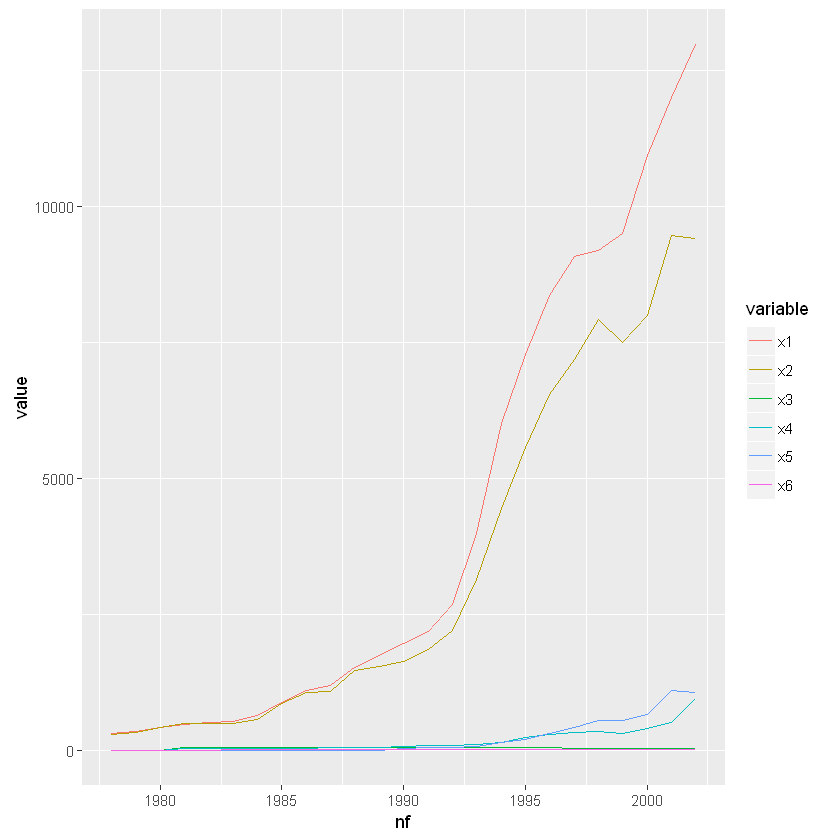

In [43]:
ggplot(mt, aes(nf,value,color = variable)) + geom_line()